In [16]:
import os, sys
sys.path.append("../common/")
from python_tools import *

import math
import ROOT
from scipy.integrate import quad 


Welcome to JupyROOT 6.20/04


In [17]:
def flux(theta,E):
    # cm-2s-1Sr-1 T. K. Gaisser, Cosmic Rays and Particle Physics, Cambridge University Press, 1990, Page69
    return  0.14 * pow(E,-2.7) * (1/(1+ 1.1*E*math.cos(theta)/115) + 0.054/(1 + 1.1*E*math.cos(theta)/850) )

In [18]:
print(flux(-1.5,0.1))
print(flux(1.5,0.1))


73.95040626721509
73.95040626721509


In [19]:
NA              = 6.02214076E23     # mol-1
ArgonMolarMass  = 39.948            # gr mol-1
ArgonActiveMass = 87E6              # gr
fiductialVolume = 200*200*1000      # cm3
ArgonDensity    = 1.3836            # gr cm-3 
Ntargets        = NA * fiductialVolume * ArgonDensity / ArgonMolarMass
Nnucl           = Ntargets * 40
print("Ntargets %E\nNnucl %E" % (Ntargets,Nnucl))

Ntargets 8.343080E+29
Nnucl 3.337232E+31


In [20]:
EMIN = 0.1
EMAX = 10
EBINS = np.linspace(EMIN,EMAX,500)
ANGLE_MIN=-1.0
ANGLE_MAX=1.0

In [21]:
fCS = ROOT.TFile.Open("~/Data/MicroBooNE/mu4nu/xsec_argon40_spline_EMPlusMEC_G18_10a_02_11a.root");
gCS = fCS.Get("e-_Ar40/qel_em_p")

In [27]:
integratedFlux = np.array([quad(flux, ANGLE_MIN, ANGLE_MAX, args=(e))[0] for e in EBINS])
xsec = np.array([gCS.Eval(e) for e in EBINS])*1e-38
Nevents = xsec*integratedFlux*Ntargets

In [28]:
%matplotlib notebook

<IPython.core.display.Javascript object>


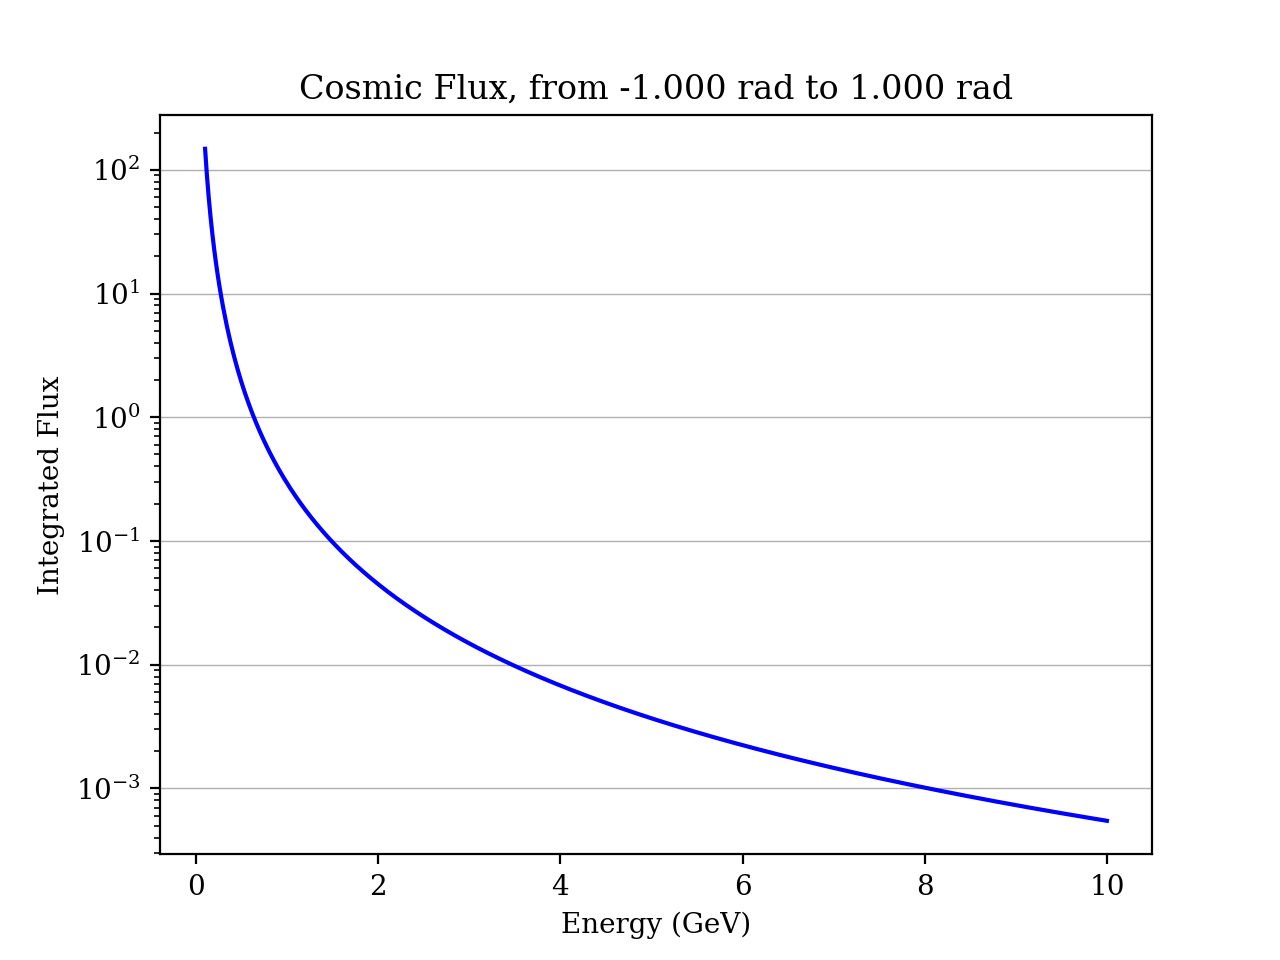

In [29]:
fig,ax = plt.subplots()

plt.grid(axis='y', linewidth=0.5)
plt.plot(EBINS,integratedFlux)
plt.yscale('log')
plt.title("Cosmic Flux, from %2.3f rad to %2.3f rad" %(ANGLE_MIN,ANGLE_MAX))
plt.xlabel("Energy (GeV)")
plt.ylabel("Integrated Flux")
plt.show()

<IPython.core.display.Javascript object>


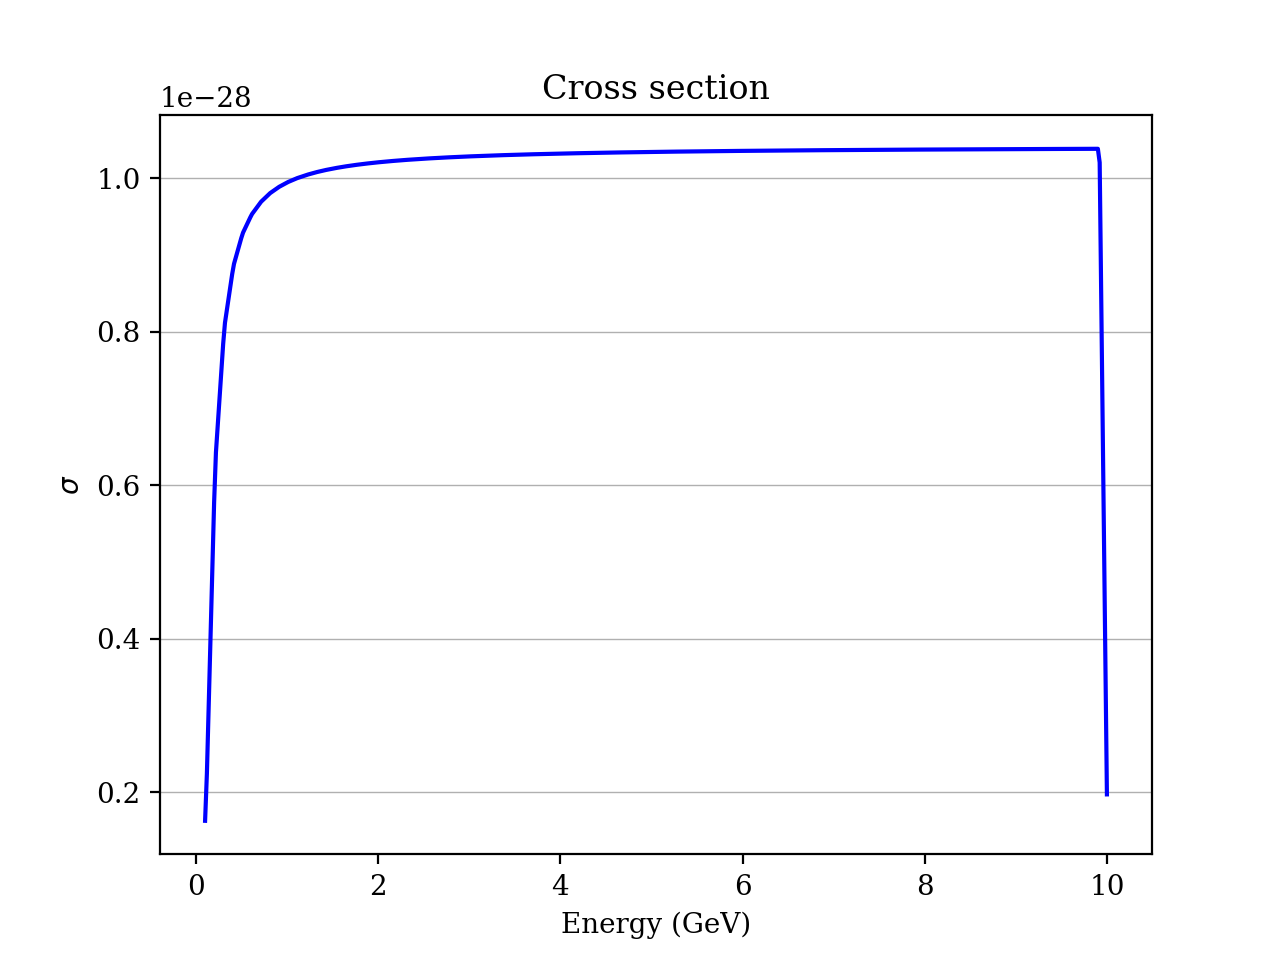

In [30]:
fig,ax = plt.subplots()

plt.grid(axis='y', linewidth=0.5)
plt.plot(EBINS,xsec)
plt.title("Cross section")
plt.xlabel("Energy (GeV)")
plt.ylabel("$\sigma$")
plt.show()

<IPython.core.display.Javascript object>


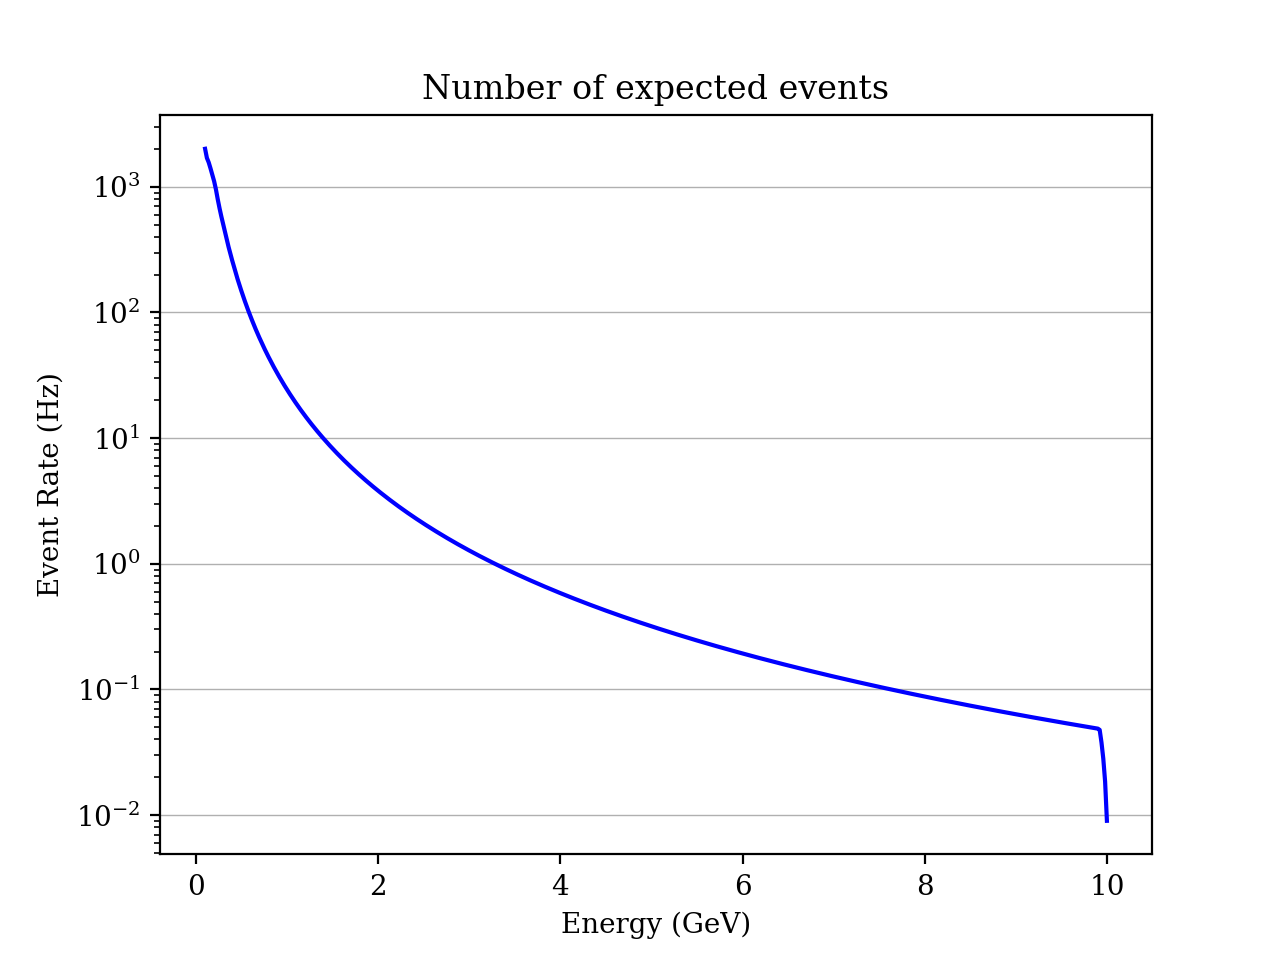

In [31]:
fig,ax = plt.subplots()

plt.grid(axis='y', linewidth=0.5)
plt.plot(EBINS,Nevents)
plt.yscale('log')
plt.title("Number of expected events")
plt.xlabel("Energy (GeV)")
plt.ylabel("Event Rate (Hz)")
plt.show()

In [ ]:
#xsec_f = uproot.open("~/Data/MicroBooNE/mu4nu/xsec_argon40_spline_EMPlusMEC_G18_10a_02_11a.root")

In [ ]:
#xsec_f["e-_Ar40/qel_em_p"].__dict__